<a href="https://colab.research.google.com/github/fedhere/MLPNS_FBianco/blob/main/CART/titanic_in_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import pylab as pl
import os
import json 
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [1]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [7]:

pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!kaggle --version

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.9/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.9/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [8]:
cd gdrive/My\ Drive

/content/gdrive/My Drive


In [35]:
cd /content/gdrive/MyDrive

/content/gdrive/MyDrive


In [29]:
pwd

'/content/gdrive/MyDrive'

In [18]:
!chmod 600 kaggle.json

In [27]:
ls -a *kaggle*

kaggle.json

kaggleTitanic:
gender_submission.csv  TitanicTree      titanic.zip
test.csv               TitanicTree.pdf  train.csv


In [23]:
envs = json.load(open(".kaggle/kaggle.json", "r"))


In [22]:
envs.keys()

dict_keys(['username', 'key'])

In [37]:
os.environ["KAGGLE_USERNAME"] = envs["username"]
os.environ["KAGGLE_KEY"] = envs["key"]

In [38]:
!kaggle --version

Kaggle API 1.5.13


In [39]:
!kaggle datasets list

ref                                                        title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
salvatorerastelli/spotify-and-youtube                      Spotify and Youtube                              9MB  2023-03-20 15:43:25           6145        233  1.0              
erdemtaha/cancer-data                                      Cancer Data                                     49KB  2023-03-22 07:57:00           1980         48  1.0              
ulrikthygepedersen/fastfood-nutrition                      Fastfood Nutrition                              12KB  2023-03-21 10:02:41           2137         45  1.0              
lokeshparab/amazon-products-dataset                        Amazon Products Sales Dataset 2023              80M

In [42]:
!kaggle datasets list -s health

ref                                                 title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
andrewmvd/fetal-health-classification               Fetal Health Classification                          46KB  2020-10-12 00:05:48          20747        419  1.0              
hhs/health-insurance-marketplace                    Health Insurance Marketplace                        829MB  2017-05-01 20:16:50          25775        606  0.7352941        
shariful07/student-mental-health                    Student Mental health                                 2KB  2023-02-17 02:11:56          16843        246  0.8235294        
alexteboul/diabetes-health-indicators-dataset       Diabetes Health Indicators Dataset                    6MB  2021-11-0

In [43]:
!mkdir MLPNS2023

mkdir: cannot create directory ‘MLPNS2023’: File exists


In [44]:
cd MLPNS2023

/content/gdrive/MyDrive/MLPNS2023


In [45]:
!mkdir kaggleTitanic

In [46]:
cd kaggleTitanic

/content/gdrive/MyDrive/MLPNS2023/kaggleTitanic


In [47]:
!kaggle competitions download -c titanic

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 1.59MB/s]


In [48]:
!ls

titanic.zip


In [49]:
!unzip titanic.zip

Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [50]:
!ls 

gender_submission.csv  test.csv  titanic.zip  train.csv


In [51]:
titanic = pd.read_csv("train.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [52]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [53]:
titanic = titanic[['Pclass', 'Sex', 'Age']]
titanic.shape

(891, 3)

In [54]:
titanic.describe()

,Pclass,Age
count,891.000000,714.000000
mean,2.308642,29.699118
std,0.836071,14.526497
min,1.000000,0.420000
25%,2.000000,20.125000
50%,3.000000,28.000000
75%,3.000000,38.000000
max,3.000000,80.000000


In [55]:
titanic["Sex"]

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [57]:
titanic.dropna(inplace=True)

<ipython-input-57-0e9622e1a85c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic.dropna(inplace=True)


In [58]:
titanic.describe()

,Pclass,Age
count,714.000000,714.000000
mean,2.236695,29.699118
std,0.838250,14.526497
min,1.000000,0.420000
25%,1.000000,20.125000
50%,2.000000,28.000000
75%,3.000000,38.000000
max,3.000000,80.000000


In [60]:
titanic["gender"] = titanic["Sex"].map({"male":0, "female":1})

<ipython-input-60-a0ac23748edf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic["gender"] = titanic["Sex"].map({"male":0, "female":1})


In [61]:
titanic

,Pclass,Sex,Age,gender
0,3,male,22.0,0
1,1,female,38.0,1
2,3,female,26.0,1
3,1,female,35.0,1
4,3,male,35.0,0
...,...,...,...,...
885,3,female,39.0,1
886,2,male,27.0,0
887,1,female,19.0,1
889,1,male,26.0,0


In [64]:
titanic.drop("Sex", axis=1, inplace=True)

<ipython-input-64-16ea94ccc707>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic.drop("Sex", axis=1, inplace=True)


In [65]:
titanic

,Pclass,Age,gender
0,3,22.0,0
1,1,38.0,1
2,3,26.0,1
3,1,35.0,1
4,3,35.0,0
...,...,...,...
885,3,39.0,1
886,2,27.0,0
887,1,19.0,1
889,1,26.0,0


In [72]:
titanic_target = pd.read_csv("train.csv")[["Survived", 
                                           "Pclass",	"Sex",	"Age"]].dropna()
titanic_target

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0
...,...,...,...,...
885,0,3,female,39.0
886,0,2,male,27.0
887,1,1,female,19.0
889,1,1,male,26.0


In [73]:
titanic_target = titanic_target["Survived"]

In [66]:
from sklearn import tree
tree.DecisionTreeClassifier?

In [80]:
clf = tree.DecisionTreeClassifier(max_depth=5, random_state=222)

In [81]:
clf.fit(titanic.values, titanic_target.values)

DecisionTreeClassifier(max_depth=5, random_state=222)

In [82]:
clf.score(titanic.values, titanic_target.values)

0.8263305322128851

In [83]:
import graphviz 
dot_data = tree.export_graphviz(clf, feature_names=titanic.columns, 
                                out_file=None) 
graph = graphviz.Source(dot_data) 

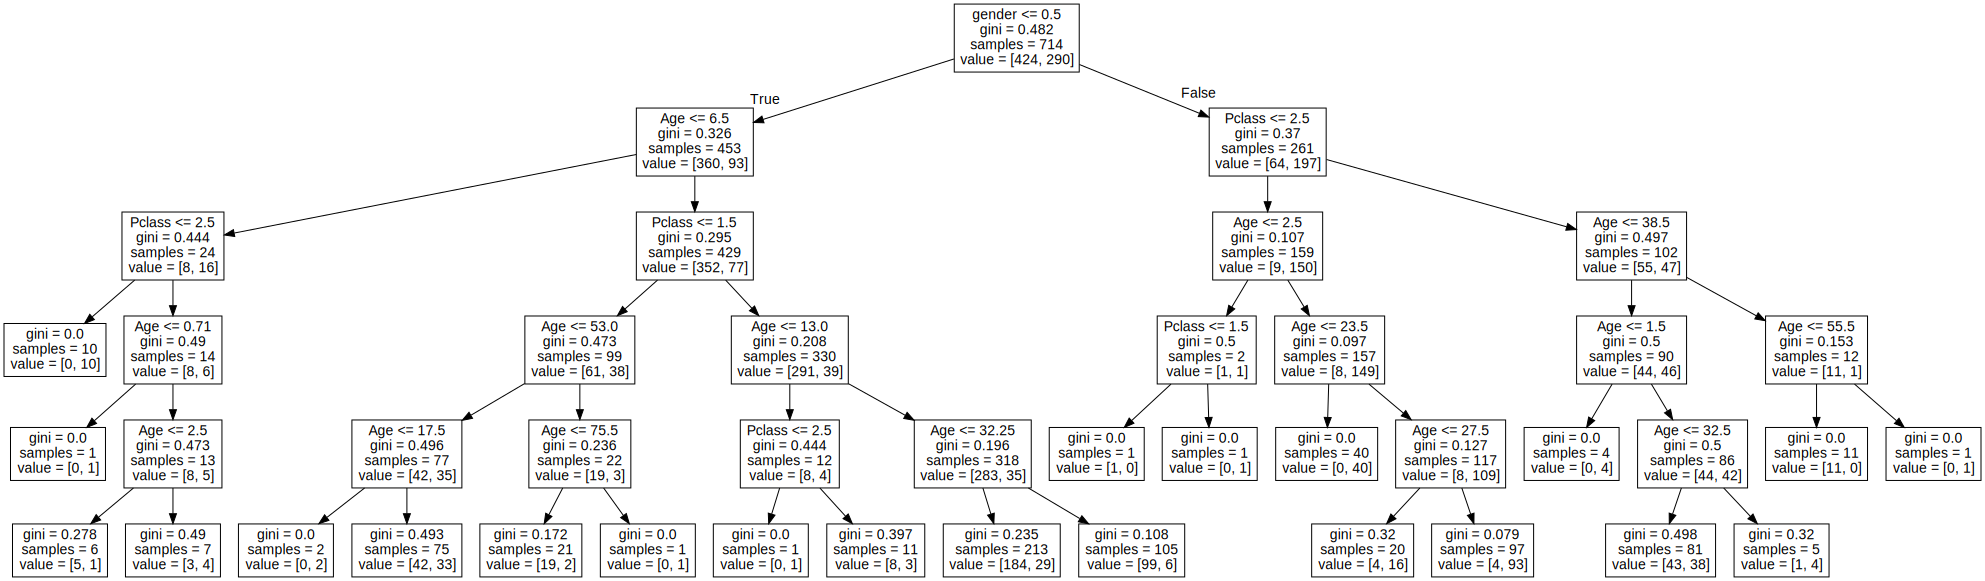

In [84]:
graph

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
train_test_split?

In [87]:
X_train, X_test, y_train, y_test = train_test_split(titanic.values, titanic_target.values, test_size=0.2)

In [88]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=222)

In [89]:
clf.score(X_train, y_train)

0.8336252189141856

In [90]:
clf.score(X_test, y_test)

0.7972027972027972

In [91]:
clf2 = tree.DecisionTreeClassifier(max_depth=3, random_state=222)

In [92]:
clf2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=222)

In [93]:
clf2.score(X_train, y_train)

0.8038528896672504

In [94]:
clf2.score(X_test, y_test)

0.8181818181818182

In [97]:
clf0 = tree.DecisionTreeClassifier(random_state=222).fit(X_train, y_train)

In [98]:
clf0.score(X_train, y_train)

0.9054290718038529

In [99]:
clf0.score(X_test, y_test)

0.8111888111888111